# Codigo para definir un problema

In [2]:
from abc import ABC, abstractmethod


class EstadoProblema:
    """
    La clase EstadoProblema es abstracta.
    Representa un estado o configuración del problema a resolver.
    
    Es una interfaz simplificada para utilizarse
    en los algoritmos de búsqueda del curso.
    
    Al definir un problema particular hay que implementar los métodos
    abstractos
    """

    @abstractmethod
    def expand():
        """
        :return: el conjunto de estados sucesores
        """
        pass

    @abstractmethod
    def get_depth():
        """
        :return: la profundidad del estado
        """
        pass

    @abstractmethod
    def get_parent():
        """
        :return: referencia al estado predecesor o padre
        """
        pass


# Implemnetacion del cubo Rubik

Siguiente es una implementacion tosca del cubo de rubik

In [3]:
from functools import reduce
from termcolor import colored
from random import choice
from itertools import product

# Códigos de los colores
# Blanco
W = 0;
# Verde
G = 1;
# Rojo
R = 2;
# Azul
B = 3;
# Azul cielo
C = 4;
# Amarillo
Y = 5;

# Diccionario con los nombres para los códigos
color_map = {
    0:"white",
    1:"green",
    2:"red",
    3:"blue",
    4:"cyan",
    5:"yellow"}

# Cada Letra será una posición relativa a los colores de 
# los cubos de los centros de cada cara
# (los centros no cambian de posción con los giros)
# Código de letra : (localización del bloque, color de la ubicación)
#
# Hay que imaginar el cubo desdoblado
# Así se interpretan las letras
#
#     ABC
#     DEF
#     GHI
# JKL MNÑ OPQ RST
# UVW XYZ abc def
# ghi jkl mnñ opq
#     rst
#     uvw
#     xyz
#
# El cubo esta codificado como una secuencia de bits
# Cada subcubo tiene 3 bits
# Este es el código de colores
#
# 000 White
# 001 Green
# 010 Red
# 011 Blue
# 100 Cian (El naranja no esta disponible como color de terminal)
# 101 Yellow
#
code = {
    'A' : (0,W),
    'B' : (3,W),
    'C' : (6,W),
    'D' : (9,W),
    'E' : (12,W),
    'F' : (15,W),
    'G' : (18,W),
    'H' : (21,W),
    'I' : (24,W),
    'J' : (27,G),
    'K' : (30,G),
    'L' : (33,G),
    'M' : (36,R),
    'N' : (39,R),
    'Ñ' : (42,R),
    'O' : (45,B),
    'P' : (48,B),
    'Q' : (51,B),
    'R' : (54,C),
    'S' : (57,C),
    'T' : (60,C),
    'U' : (63,G),
    'V' : (66,G),
    'W' : (69,G),
    'X' : (72,R),
    'Y' : (75,R),
    'Z' : (78,R),
    'a' : (81,B),
    'b' : (84,B),
    'c' : (87,B),
    'd' : (90,C),
    'e' : (93,C),
    'f' : (96,C),
    'g' : (99,G),
    'h' : (102,G),
    'i' : (105,G),
    'j' : (108,R),
    'k' : (111,R),
    'l' : (114,R),
    'm' : (117,B),
    'n' : (120,B),
    'ñ' : (123,B),
    'o' : (126,C),
    'p' : (129,C),
    'q' : (132,C),
    'r' : (135,Y),
    's' : (138,Y),
    't' : (141,Y),
    'u' : (144,Y),
    'v' : (147,Y),
    'w' : (150,Y),
    'x' : (153,Y),
    'y' : (156,Y),
    'z' : (159,Y)    
}

# Espacios en blanco, para la impresión del cubo
BLANK = ' '*6
# chr(FILL) caracter de llenado
FILL = 9608
# cuantas veces el caracter de llenado
K = 2
    
# las acciones son listas de listas de listas de tuplas
# Representan giros de 90 grados en todas las caras del cubo
actions = [
# La primer lista interna es el eje X
[
    # La primera lista de la primera lista interna
    # Es la lista de tuplas con parejas que indican
    # que pasa con cada letra al aplicar la acción.
    # Giro 90 grados en la dirección de las manecillas
    # del reloj en la cara inferior de acuerdo a la
    # figura de referencia y visto desde arriba
    # por ejemplo ('A','g') indica que 'g' tomará la
    # posición de 'A' al rotar este eje
    [('A','g'),('B','U'),('C','J'),('Q','A'),('c','B'),
     ('ñ','C'),('z','Q'),('y','c'),('x','ñ'),('g','z'),
     ('U','y'),('J','x'),('R','T'),('S','f'),('T','q'),
     ('d','S'),('f','p'),('o','R'),('p','d'),('q','o')],
    # Giro 90 grados en la dirección de las manecillas
    # del reloj en la cara superior visto desde arriba
    [('G','i'),('H','W'),('I','L'),('O','G'),('a','H'),
     ('m','I'),('t','O'),('s','a'),('r','m'),('i','t'),
     ('W','s'),('L','r'),('M','j'),('N','X'),('Ñ','M'),
     ('Z','N'),('l','Ñ'),('k','Z'),('j','l'),('X','k')]
],\
# La segunda lista interna es el eje Y
[
    # Giro de 90 grados hacia el frente de la cara
    # que queda del lado izquierdo
    [('A','q'),('D','f'),('G','T'),('M','A'),('X','D'),
     ('j','G'),('r','M'),('u','X'),('x','j'),('T','x'),
     ('f','u'),('q','r'),('J','g'),('K','U'),('L','J'),
     ('U','h'),('W','K'),('g','i'),('h','W'),('i','L')],
    # Giro de 90 grados hacia el frente de la cara
    # que queda del lado derecho
    [('C','o'),('F','d'),('I','R'),('Ñ','C'),('Z','F'),
     ('l','I'),('t','Ñ'),('w','Z'),('z','l'),('o','t'),
     ('d','w'),('R','z'),('O','Q'),('P','c'),('Q','ñ'),
     ('a','P'),('c','n'),('m','O'),('n','a'),('ñ','m')]
],\
# La tercera lista interna es el eje Z
[
    # Giro de 90 grados hacia la derecha de la cara
    # que se encuentra arriba en la figura 2D
    [('J','R'),('K','S'),('L','T'),('M','J'),('N','K'),
     ('Ñ','L'),('O','M'),('P','N'),('Q','Ñ'),('R','O'),
     ('S','P'),('T','Q'),('G','A'),('H','D'),('I','G'),
     ('F','H'),('C','I'),('B','F'),('A','C'),('D','B')], 
    # Giro de 90 grados hacia la derecha de la cara
    # que se encuentra abajo en la figura 2D
    [('g','o'),('h','p'),('i','q'),('j','g'),('k','h'),
     ('l','i'),('m','j'),('n','k'),('ñ','l'),('o','m'),
     ('p','n'),('q','ñ'),('r','x'),('s','u'),('t','r'),
     ('u','y'),('w','s'),('x','z'),('y','w'),('z','t')]
]]

# calcula la configuración ordenada del cubo
# por única vez
initial_conf = reduce(lambda x,y:(0,x[1]|(y[1]<<y[0])), \
[(0,0)]+[v for k,v in code.items()])[1]

# La clase abtrae el grafo de estados acciones
class RubikPuzzle(EstadoProblema):
    """
    Cubo de Rubik de 3 X 3
    Implementación con todos los subcubos 
    Cada subcubo una terna de bit que codifica su color
    """
    def __init__(self,parent = None,action=None,depth=0,pattern=None):
        """
        Crea el rompecabezas de Rubik.
        :param parent: el predecesor de la configuración a crear
        :param action: la acción que se toma para crear al hijo
        a partir de su predecesor
        :param depth: la profundidad del nodo
        :param pattern: un diccionario con la configuración a 
        establecer en el nodo
        """
        self.parent = parent
        self.depth = depth
        if parent != None and action!=None:
            # se crea el cubo a partir de la configuración del padre
            self.configuration = parent.configuration
            # se aplica la acción
            self.apply(action)
        elif pattern!=None:
            # se establece la configuración con el mapa
            self.configuration = self.initialize(pattern)
        else:
            # un cubo ordenado
            self.configuration = initial_conf
            
    def initialize(self,pattern):
        """
        Establece la configuración del cubo
        :param pattern: la configuración a establecer en diccionario
        :return: la configuración codificada en bits
        """
        # la configuración a establecer esta en un
        # diccionario {letra:código de color}
        return reduce(lambda x,y:x|y,\
        [val<<(code[key][0]) for key,val in pattern.items()])
            
    def cube(self,symbol):
        """
        Un subcubo a mostrar
        :param symbol: letra de la posición a mostrar
        :return: la cadena a mostrar como subcubo
        """
        n = code[symbol][0]
        return \
        colored(chr(FILL),color_map[(((7<<n)&self.configuration)>>n)])*K
        
    def apply(self,action):
        """
        Aplica la acción a la configuración
        """
        # tupla de acción (eje,renglón,dirección)
        # giro de izquierda a derecha
        if(action[2]==0):
            moved,mask = reduce(lambda x,y:(x[0]|y[0],x[1]|y[1]),\
            [self.move(x) for x in actions[action[0]][action[1]]])
        else: #giro de derecha a izquierda
            moved,mask = reduce(lambda x,y:(x[0]|y[0],x[1]|y[1]),\
            [self.move((b,a)) for a,b in actions[action[0]][action[1]]])
        self.configuration = moved | \
        ((((2<<162)-1)^mask)&self.configuration)
                
    def move(self,locations):
        """
        Mueve el valor de una localidad a otra
        :param locations: las posiciones a mover
        :return: tupla con el bloque movido y la máscara de bits
        """
        # de la posición i a la j
        i = code[locations[0]][0]
        j = code[locations[1]][0]
        #regresa tanto el bloque movido como la máscara
        return (((((7<<i)&self.configuration)>>i)<<j),(7<<i)|(7<<j))
        
            
    def __str__(self):
        """
        El cubo a mostar en texto.
        :return: representación del cubo en texto
        """
        return ('\n'+
        BLANK+self.cube('A')+self.cube('B')+self.cube('C')+'\n'+
        BLANK+self.cube('D')+self.cube('E')+self.cube('F')+'\n'+
        BLANK+self.cube('G')+self.cube('H')+self.cube('I')+'\n'+
        self.cube('J')+self.cube('K')+self.cube('L')+
        self.cube('M')+self.cube('N')+self.cube('Ñ')+
        self.cube('O')+self.cube('P')+self.cube('Q')+  
        self.cube('R')+self.cube('S')+self.cube('T')+'\n'+
        self.cube('U')+self.cube('V')+self.cube('W') +
        self.cube('X')+self.cube('Y')+self.cube('Z') +
        self.cube('a')+self.cube('b')+self.cube('c')+ 
        self.cube('d')+self.cube('e')+self.cube('f') +'\n'+        
        self.cube('g')+self.cube('h')+self.cube('i')+
        self.cube('j')+self.cube('k')+self.cube('l') +
        self.cube('m')+self.cube('n')+self.cube('ñ')+ 
        self.cube('o')+self.cube('p')+self.cube('q') +'\n'+                
        BLANK+self.cube('r')+self.cube('s')+self.cube('t')+'\n'+
        BLANK+self.cube('u')+self.cube('v')+self.cube('w')+'\n'+
        BLANK+self.cube('x')+self.cube('y')+self.cube('z')+'\n' )
        
    def __repr__(self):
        """
        :return: representación visual del cubo
        """
        return self.__str__()

    def __eq__(self,other):
        """
        Dos cubos son iguales si sus configuraciones son iguales
        :param other: el otro cubo
        :return: verdadero si son iguales, falso de otra forma
        """
        return (isinstance(other, self.__class__)) and \
        (self.configuration==other.configuration)

    def __ne__(self,other):
        """
        Determina si los cubos son diferentes
        :param other: el otro cubo
        :return: verdadero si los cubos son diferentes, falso de 
        otra forma
        """
        return not self.__eq__(other)
        
    def __lt__(self,other):
        """
        Determina si la profundidad de un cubo es menor que la de otro
        :param other: el otro cubo
        :return: verdadero si la profundidad del cubo es menor a la del otro
        """
        return self.depth < other.depth

    def __hash__(self):
        """
        Función de hash para un cubo
        :return: un entero hash 
        """
        return hash(self.configuration)
        
    def pattern_equals(self,pattern,target=initial_conf):
        """
        Determina si el cubo es parte de un patrón
        :param pattern: el patrón a verificar
        :target: la meta
        :return: verdadero si el patrón incluye la 
        configuración del cubo
        """
        mask = RubikPuzzle.get_pattern_mask(pattern)
        return ((mask&self.configuration)^(mask&target))==0
        
    @staticmethod
    def get_pattern_mask(pattern):
        """
        Calcula la mácara de bits para extraer los patrones
        :param patter: el patrón que define la máscara
        :return la máscara de bits
        """
        return reduce(lambda x,y:x|y,[(7<<code[letter][0])\
        for letter in pattern])
    
    def get_parent(self):
        return self.parent
    
    def get_depth(self):
        return self.depth
        
    def shuffle(self,n):
        """
        Desordena el cubo
        :param n: número de movimientos
        """
        for i in range(0,n):
            self.apply((choice([0,1,2]),choice([0,1]),choice([0,1])))
            
    def expand(self):
        # quitamos el predecesor
        return list(filter(lambda x: \
        (x!=self.parent), \
        [RubikPuzzle(self,action,self.depth+1) \
        for action in product([0,1,2],[0,1],[0,1])]))

 # Implementacion de algoritmos

 la sigiuiente es la funcion para obtener la ruta

In [4]:
from collections import deque

# trajectory nos regresará la trayectoria a partir de un estado


def trajectory(end):
    # nos valemos de un deque para almacenar la ruta
    sequence = deque()
    # agregamos el estado final o meta
    sequence.append(end)
    # nos vamos regresando al estado predecesor mientras este exista
    while end.get_parent():
        # nos movemos al predecesor
        end = end.get_parent()
        # lo agregamos a la lista
        sequence.append(end)
    # invertimos el orden de la secuencia
    sequence.reverse()
    # lo regresamos como una lista
    return list(sequence)


## algoritmo A*

Como los tres algortimos escojidos se  pueden escribir como  una forma del algoritmo A* 
se utilisara esta clase como plantilla para implementar los demas en la sigueiente seccion

In [5]:
import heapq


class AStar:
    """
    Implementación del algoritmo A*
    """
    @staticmethod
    def search(origen, stop, g, h):
        """
        Búsqueda informada A*
        :param origen: estado inicial
        :param stop: función de paro, verdadera para el estado meta
        :param g: función de costo acumulado
        :param h: función heurística, costo estimado a la meta
        """
        # La historia de tamaño de la agenda y nodos expandidos
        historia = [(0, 0)]
        # Nuestra cola de prioridad
        agenda = []
        # Conjunto de estados expandidos
        expandidos = set()
        # Condición trivial
        if stop(origen):
            # No se requirieron nodos en las estructuras de datos
            return (trajectory(origen), historia)

        # Estado inicial a la cola de prioridad
        # La prioridad será f(s) = g(s) + h(s),
        # para s una configuración
        def f(s): return g(s) + h(s)

        # Agregamos el origen a la agenda
        heapq.heappush(agenda, (f(origen), origen))

        # Mientras la agenda no este vacía
        while agenda:
            # agregamos los tamaños a la historia
            historia.append((len(agenda), len(expandidos)))
            # El frente de la cola de prioridad es la configuración
            # de menor costo f
            nodo = heapq.heappop(agenda)[1]
            # Agregamos el estado a la lista de expandidos
            expandidos.add(nodo)
            # En A* es necesario verificar la condición de
            # paro tras sacar el elemento de la agenda
            if stop(nodo):
                return (trajectory(nodo), historia)
            # Realizamos la expansión del vértice
            for sucesor in nodo.expand():
                # Agregamos a la cola de prioridad siempre que no se haya
                # expandido previamente
                if sucesor not in expandidos:
                    heapq.heappush(agenda, (f(sucesor), sucesor))
        # No hay ruta al nodo meta
        # instrucción redundante
        return None


## Algoritmos
Funsiones para  describir los tres algoritmos escojidos

In [6]:
# definimos una función para A*
def a_star(p,stop,g,h):
    return AStar.search(p,stop,g,h)

# función para UCS
def ucs(p,stop,g):
    return AStar.search(p,stop,g,lambda s:0)
    
# función para GBFS
def gbfs(p,stop,h):
    return AStar.search(p,stop,lambda s:0,h)

# Ejecucion del Programa

## heuristica 
Para realizar el algortimo A* se requiere obtener  una heruistica que permite informar del problema y minimisar la busqueda

In [7]:
# creo un cubo de rubik para hallar la euristica
cubo = RubikPuzzle()

# creo la Base de datos  basada en cubos esquina
from collections import deque

class PatternBasedHeuristic:
    """
    Implementación de Hurística para el cubo de Rubik
    Basada en una base de datos de patrones
    """
    def __init__(self,objective=None,depth=6,pattern=None):
        """
        Crea la base de datos de patrones
        :param objective: el estado meta
        :param depth: la profundidad máxima de los estados en la base
        :param pattern: el patrón con el que se forma la base
        """
        print('computing pattern data base...')
        if(objective==None):
            # De no establecerse otro objetivo se pide ordenar el cubo
            objective = RubikPuzzle()
        # para generar la base de datos nuestra búsqueda es tipo BFS
        agenda = deque()
        self.explored = set()
        self.depth = depth
        # agregamos el estado objetivo como nodo inicial
        agenda.append(objective)
        # nuestra base de datos es un diccionario
        self.patterns = {}
        # si el patrón no se especifica usaremos las esquinas
        if(pattern==None):
            pattern ='ACGIJLgiMÑjlOQmñRToqrtxz'
        self.pattern = pattern
        # obtiene la mascara para este patrón
        self.pattern_mask = RubikPuzzle.get_pattern_mask(pattern)
        # mientras la agenda no este vacía
        while(agenda):
            # sacamos el frente de la agenda (agenda es una cola)
            node = agenda.popleft()
            # agregamos a expandidos
            self.explored.add(node)
            # la configuración del nodo
            conf = self.pattern_mask&node.configuration
            # agregamos la subconfiguración a la base de datos
            # si es la primera vez que la descubrimos
            # le asociamos la profundidad
            if conf not in self.patterns:
                self.patterns[conf] = node.depth
            for child in node.expand():
                if(child.depth>depth):
                    #hemos terminado
                    return 
                elif child not in self.explored:
                    # agregamos al hijo en caso de que no se haya
                    # expandido
                    agenda.append(child)
                    
                    
    def heuristic(self,puzzle):
        """
        calcula la heurística usando la base de datos
        """
        key = self.pattern_mask&puzzle.configuration
        return (self.patterns[key] \
        if key in self.patterns else self.depth+1)
# creamos la base de datos de patrones
db = PatternBasedHeuristic(depth=5)
# definimos la heurística h usando la base de datos
h = db.heuristic

computing pattern data base...


## funcion para plotear

In [12]:
import matplotlib.pyplot as plt

In [13]:
# definimos una función para graficar el consumo de recursos del algoritmo
def dibujar_grafica(historia,algoritmo):
    
    n_agenda, n_expandidos = zip(*historia)
    n_total =  [a+b for a,b in historia]
    a,=plt.plot(n_agenda,'blue')
    b,=plt.plot(n_expandidos,'red')
    c,=plt.plot(n_total,'green')
    plt.legend([a,b,c],['agenda','expandidos','total'])
    plt.xlabel('iteración')
    plt.ylabel('estados')
    plt.title('Memoria consumida por '+algoritmo)
    plt.show()

## El cubo Rubik a resolver

In [8]:
# creo un cubo de rubik
from random import seed
seed(201901)
cubo_rubik = RubikPuzzle()
cubo_rubik.shuffle(5)
print("cubo a resolver:",cubo_rubik)

cubo a resolver: 
      ██████
      ██████
      ██████
████████████████████████
████████████████████████
████████████████████████
      ██████
      ██████
      ██████



para A*
le tomó 0.0041 segundos en encontrar la solución
longitud de la ruta 5
iteraciones: 18


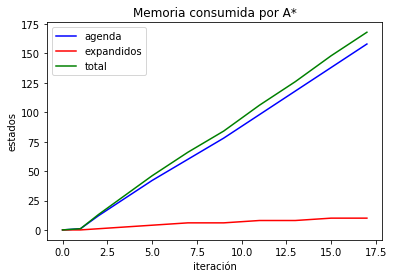

para UCS
le tomó 3.0124 segundos en encontrar la solución
longitud de la ruta 5
iteraciones: 17977


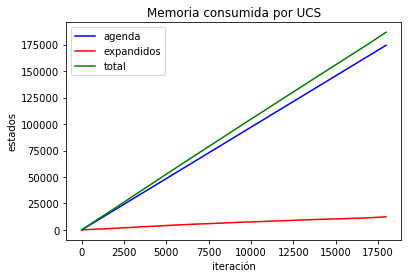

para GBFS
le tomó 0.0010 segundos en encontrar la solución
longitud de la ruta 5
iteraciones: 7


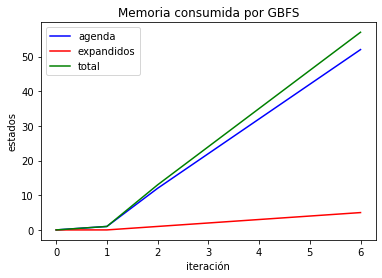

In [18]:
import timeit
from functools import partial

# función de paro
stop = lambda s: s == RubikPuzzle()
# función de costo acumulado
g = lambda s:s.get_depth()
#función heurística
#se definio anteriormente

ruta , historia= a_star(cubo_rubik,stop,lambda s: s.get_depth(), h)
# Invocamos el algoritmo A*, tomamos el tiempo que toma una ejecución
t = timeit.timeit(partial(a_star,p=cubo_rubik,stop = stop,g=g,h=h),number=1)
print("para A*")
print("le tomó %.4f segundos en encontrar la solución"%t)
print("longitud de la ruta",len(ruta)-1)
print("iteraciones:",len(historia))
dibujar_grafica(historia,'A*')
#print(ruta)


ruta , historia= ucs(cubo_rubik,stop,lambda s: s.get_depth())
# Invocamos el algoritmo UCS, tomamos el tiempo que toma una ejecución
t = timeit.timeit(partial(ucs,p=cubo_rubik,stop = stop,g=g),number=1)
print("para UCS")
print("le tomó %.4f segundos en encontrar la solución"%t)
print("longitud de la ruta",len(ruta)-1)
print("iteraciones:",len(historia))
dibujar_grafica(historia,'UCS')



ruta, historia = gbfs(cubo_rubik,stop,h)
# Invocamos el algoritmo GBFS, tomamos el tiempo que toma una ejecucióN
t = timeit.timeit(partial(gbfs,p=cubo_rubik,stop = stop,h=h),number=1)
print("para GBFS")
print("le tomó %.4f segundos en encontrar la solución"%t)
print("longitud de la ruta", len(ruta)-1)
print("iteraciones:", len(historia))
dibujar_grafica(historia, 'GBFS')
